In [1]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

sleep_df = pd.read_csv('/home/manezn98/Analisis Exploratorio de Datos/Sleep_health_and_lifestyle_dataset.csv', sep=',')

# Chequeo general

In [2]:
sleep_df.shape # Tengo 374 observaciones y 13 variables

(374, 13)

In [3]:
sleep_df.isna().sum().sum() # Tengo cero valores nulos

0

In [4]:
print(sleep_df.dtypes.value_counts())  # Tenemos 8 variables numericas y 5 categoricas
print(sleep_df.dtypes) # La variable Sleep Duration es la unica continua 

int64      7
object     5
float64    1
dtype: int64
Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


# Analisis univariado CATEGORICAS 

In [5]:
sleep_df.describe(include=object)

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,374
unique,2,11,4,25,3
top,Male,Nurse,Normal,130/85,None
freq,189,73,195,99,219


Conteo y proporciones con visualizacion

In [6]:
sleep_df.value_counts('Gender') # Tenemos mas hombres que mujeres

Gender
Male      189
Female    185
dtype: int64

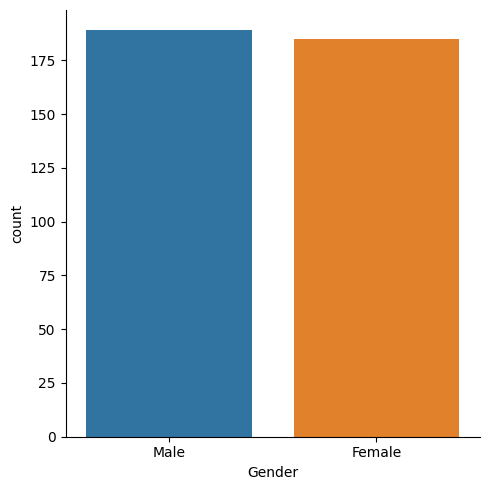

In [7]:
sns.catplot(data=sleep_df, x = 'Gender', kind='count')

{<seaborn.axisgrid.FacetGrid at 0x7f3f2e580f10>}

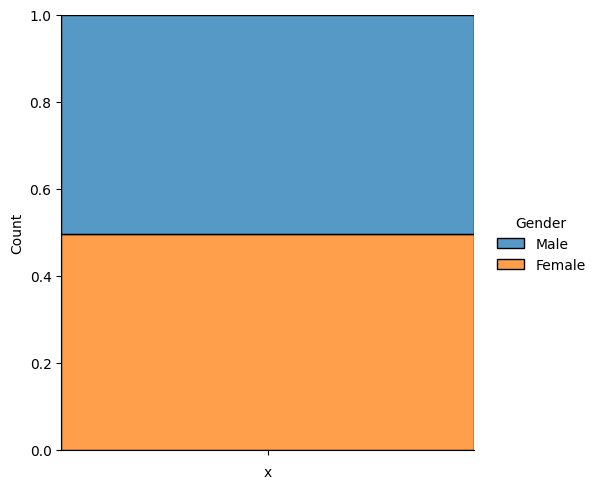

In [8]:
sleep_df.add_column('x','').pipe(lambda df: {sns.displot(data=df, x='x',hue='Gender', multiple='fill')})

In [9]:
sleep_df.value_counts('Occupation') # Tomaron muestras de personas con 11 profesiones diferentes

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
dtype: int64

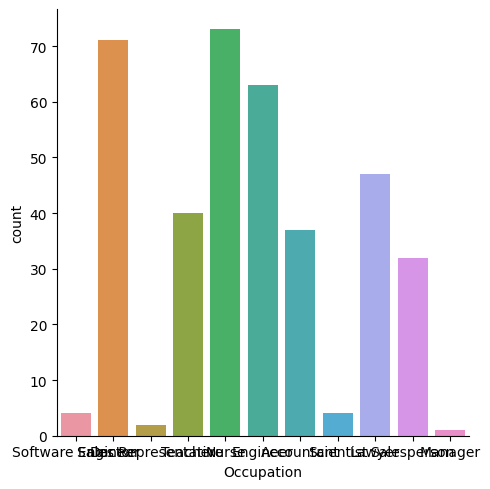

In [10]:
sns.catplot(data = sleep_df, x = 'Occupation', kind='count');

{<seaborn.axisgrid.FacetGrid at 0x7f3f2c3f5b80>}

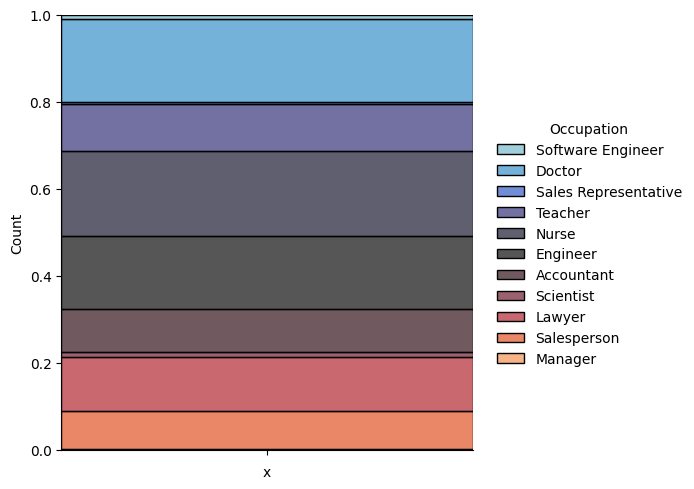

In [11]:
sleep_df.add_column('x','').pipe(lambda df: {sns.displot(data=df, x='x', hue='Occupation', multiple='fill', palette='icefire')})

In [12]:
sleep_df.value_counts('BMI Category')

# Tenemos 4 categorias BMI que son: normal, sobrepeso, peso normal y obeso

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
dtype: int64

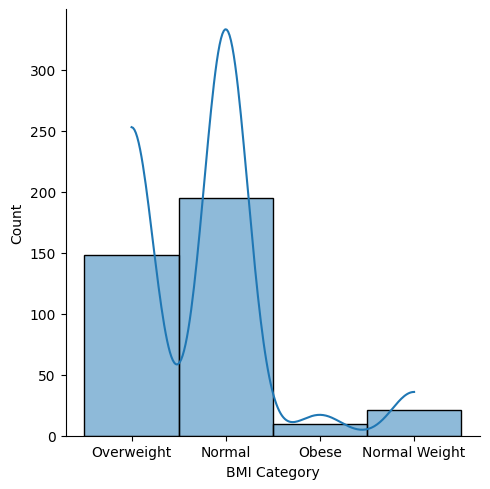

In [13]:
sns.displot(data=sleep_df, x='BMI Category', kde=True);

{<seaborn.axisgrid.FacetGrid at 0x7f3f2c2394c0>}

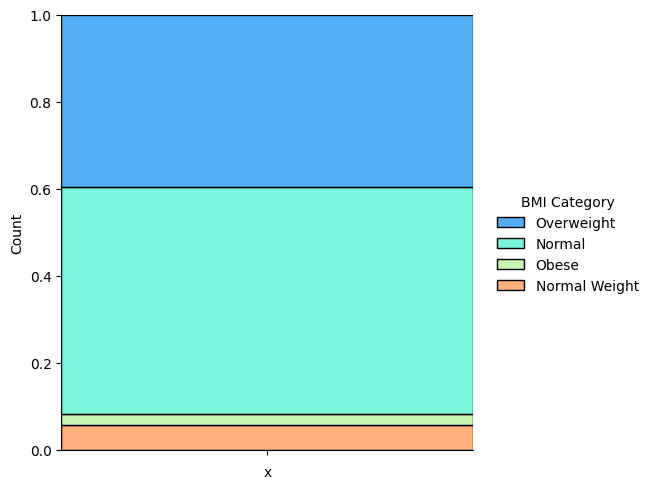

In [14]:
sleep_df.add_column('x','').pipe(lambda df: {sns.displot(data=df, x='x', hue='BMI Category', multiple='fill', palette='rainbow')})

In [15]:
sleep_df.value_counts('Sleep Disorder') # Tenemos 3 categorias de desordenes en el sueño que vendrian siendo: Apnea del sueño, insomnio y ningun desorden en el sueño

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
dtype: int64

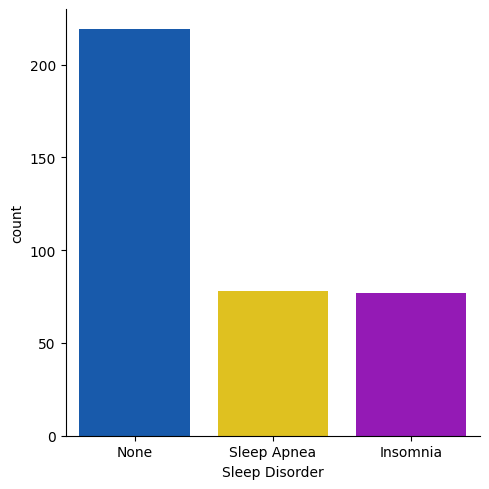

In [16]:
sns.catplot(data=sleep_df, x='Sleep Disorder', kind='count', palette='prism');

{<seaborn.axisgrid.FacetGrid at 0x7f3f27ca2a90>}

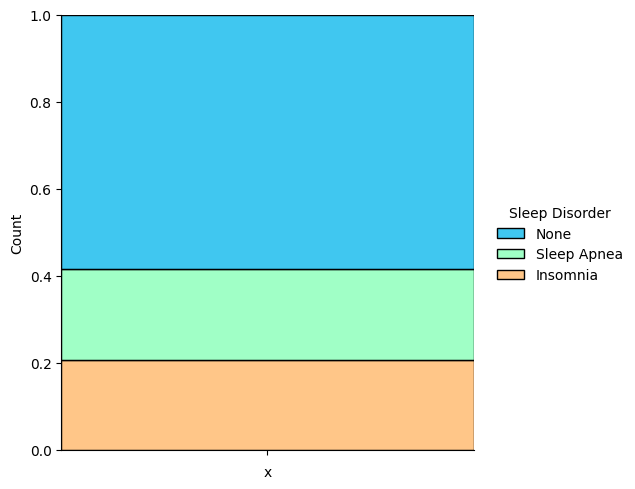

In [17]:
sleep_df.add_column('x','').pipe(lambda df: {sns.displot(data=df, x='x', hue='Sleep Disorder', multiple='fill', palette='rainbow')})

# Analisis univariado NUMERICAS

In [18]:
sleep_df.describe(include=np.number)

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


Media, Mediana, Moda        //         Rango, Desviacion Estandar, Rango intercuartilico

In [19]:
print(sleep_df.Age.mean())
print(sleep_df.Age.median())
print(sleep_df.Age.mode())

42.18449197860963
43.0
0    43
Name: Age, dtype: int64


In [20]:
min_age = sleep_df.Age.min()
max_age = sleep_df.Age.max()
range = max_age - min_age
print(range)
print(sleep_df.Age.std())
print(sleep_df.Age.quantile([0.25,0.50,0.75]))

32
8.67313346554724
0.25    35.25
0.50    43.00
0.75    50.00
Name: Age, dtype: float64


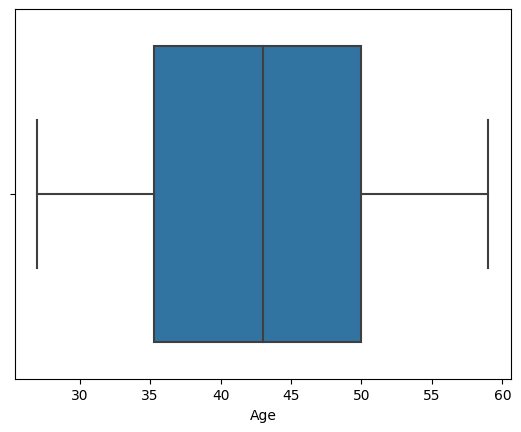

In [21]:
sns.boxplot(data=sleep_df, x='Age');

In [22]:
print(sleep_df['Sleep Duration'].mean())
print(sleep_df['Sleep Duration'].median())
print(sleep_df['Sleep Duration'].mode())

7.132085561497325
7.2
0    7.2
Name: Sleep Duration, dtype: float64


In [23]:
min_duration = sleep_df['Sleep Duration'].min()
max_duration = sleep_df['Sleep Duration'].max()

range = max_duration - min_duration
print(range)
print(sleep_df['Sleep Duration'].std())
print(sleep_df['Sleep Duration'].quantile([0.25, 0.50, 0.75]))

2.7
0.7956567308898188
0.25    6.4
0.50    7.2
0.75    7.8
Name: Sleep Duration, dtype: float64


<AxesSubplot: xlabel='Sleep Duration'>

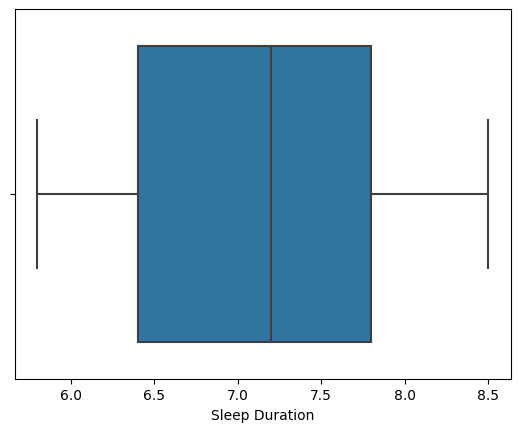

In [24]:
sns.boxplot(data=sleep_df, x='Sleep Duration')

In [25]:
print(sleep_df['Quality of Sleep'].mean())
print(sleep_df['Quality of Sleep'].median())
print(sleep_df['Quality of Sleep'].mode())

7.31283422459893
7.0
0    8
Name: Quality of Sleep, dtype: int64


In [26]:
min_quali = sleep_df['Quality of Sleep'].min()
max_quali = sleep_df['Quality of Sleep'].max()

range = max_quali - min_quali
print(range)
print(sleep_df['Quality of Sleep'].std())
print(sleep_df['Quality of Sleep'].quantile([0.25,0.50,0.75]))

5
1.1969559197336044
0.25    6.0
0.50    7.0
0.75    8.0
Name: Quality of Sleep, dtype: float64


<AxesSubplot: xlabel='Quality of Sleep'>

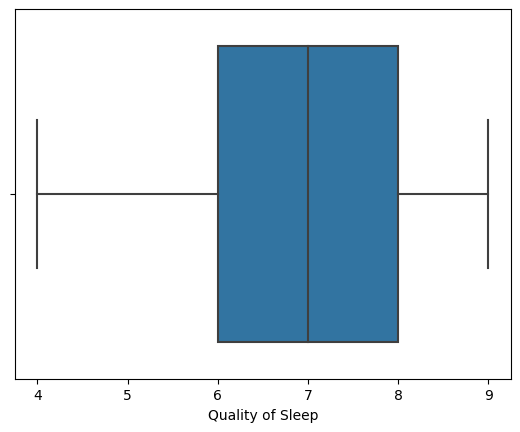

In [27]:
sns.boxplot(data=sleep_df, x='Quality of Sleep')

In [28]:
print(sleep_df['Physical Activity Level'].mean())
print(sleep_df['Physical Activity Level'].median())
print(sleep_df['Physical Activity Level'].mode())

59.17112299465241
60.0
0    60
Name: Physical Activity Level, dtype: int64


In [29]:
min_physical = sleep_df['Physical Activity Level'].min()
max_physical = sleep_df['Physical Activity Level'].max()
range = max_physical - min_physical
print(range)
print(sleep_df['Physical Activity Level'].std())
print(sleep_df['Physical Activity Level'].quantile([0.25,0.50,0.75]))

60
20.830803658071673
0.25    45.0
0.50    60.0
0.75    75.0
Name: Physical Activity Level, dtype: float64


<AxesSubplot: xlabel='Physical Activity Level'>

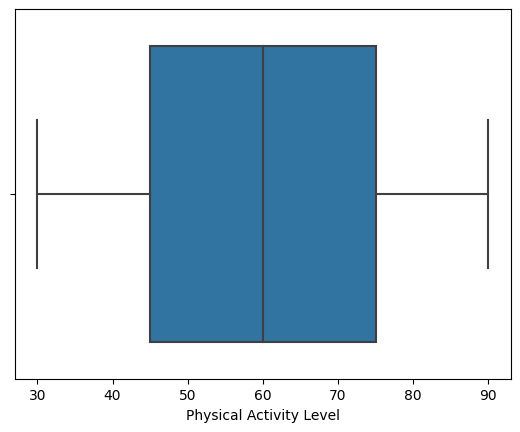

In [30]:
sns.boxplot(data=sleep_df, x='Physical Activity Level')

In [31]:
print(sleep_df['Stress Level'].mean())
print(sleep_df['Stress Level'].median())
print(sleep_df['Stress Level'].mode())

5.385026737967914
5.0
0    3
Name: Stress Level, dtype: int64


In [32]:
min_stress = sleep_df['Stress Level'].min()
max_stress = sleep_df['Stress Level'].max()
range = max_stress - min_stress

print(range)
print(sleep_df['Stress Level'].std())
print(sleep_df['Stress Level'].quantile([0.25,0.50,0.75]))

5
1.7745264441985167
0.25    4.0
0.50    5.0
0.75    7.0
Name: Stress Level, dtype: float64


<AxesSubplot: xlabel='Stress Level'>

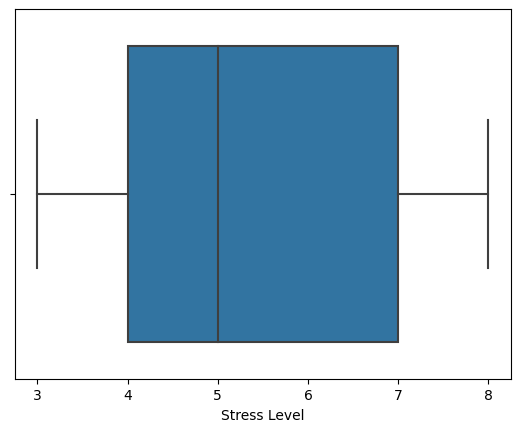

In [33]:
sns.boxplot(data=sleep_df, x='Stress Level')

In [34]:
print(sleep_df['Heart Rate'].mean())
print(sleep_df['Heart Rate'].median())
print(sleep_df['Heart Rate'].mode())

70.16577540106952
70.0
0    68
Name: Heart Rate, dtype: int64


In [35]:
min_rate = sleep_df['Heart Rate'].min()
max_rate = sleep_df['Heart Rate'].max()
range = max_rate - min_rate

print(range)
print(sleep_df['Heart Rate'].std())
print(sleep_df['Heart Rate'].quantile([0.25,0.50,0.75]))

21
4.135675535112214
0.25    68.0
0.50    70.0
0.75    72.0
Name: Heart Rate, dtype: float64


<AxesSubplot: xlabel='Heart Rate'>

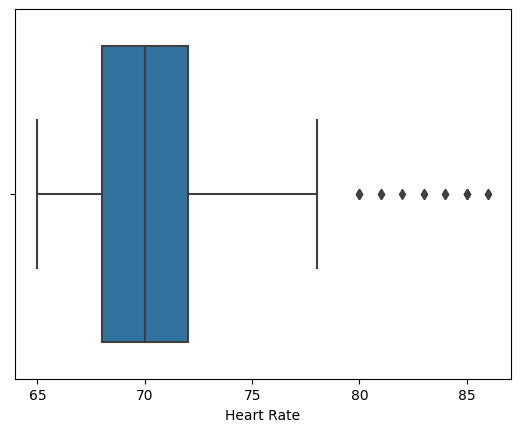

In [36]:
sns.boxplot(data=sleep_df, x='Heart Rate')

In [37]:
print(sleep_df['Daily Steps'].mean())
print(sleep_df['Daily Steps'].median())
print(sleep_df['Daily Steps'].mode())

6816.844919786096
7000.0
0    8000
Name: Daily Steps, dtype: int64


In [38]:
min_steps = sleep_df['Daily Steps'].min()
max_steps = sleep_df['Daily Steps'].max()
range = max_steps - min_steps

print(range)
print(sleep_df['Daily Steps'].std())
print(sleep_df['Daily Steps'].quantile([0.25,0.50,0.75]))

7000
1617.915679133637
0.25    5600.0
0.50    7000.0
0.75    8000.0
Name: Daily Steps, dtype: float64


<AxesSubplot: xlabel='Daily Steps'>

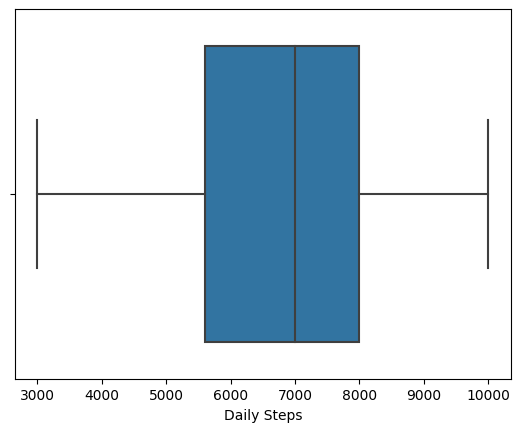

In [39]:
sns.boxplot(data=sleep_df, x='Daily Steps')

# PMF

0.4946524064171123

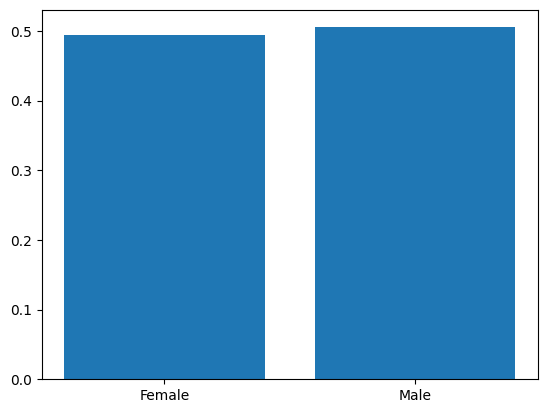

In [40]:
pmf_gender = empiricaldist.Pmf.from_seq(sleep_df['Gender'], normalize=True)
pmf_gender.bar()
pmf_gender('Male') # La probabilidad de escoger a un hombre entre los 374 encuestados es 50,53 %
pmf_gender('Female') # La probabilidad de escoger a una mujer entre los 374 encuestados es 49,47 %


0

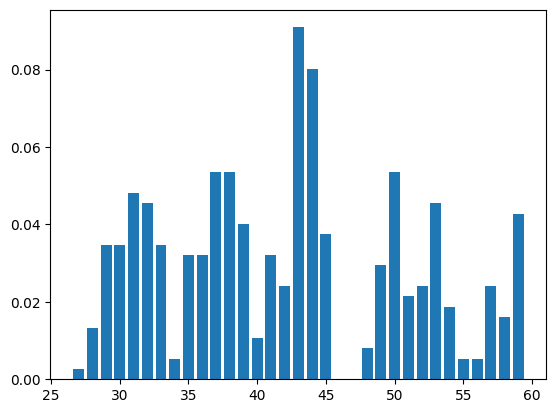

In [41]:
pmf_age = empiricaldist.Pmf.from_seq(sleep_df['Age'], normalize=True)
pmf_age.bar()
pmf_age(43)  # La probabilidad de escoger a alguien que tenga 43 años entre los encuestados es de 9,09 %
pmf_age(46)  # La probabilidad de escoger a alguien que tenga 46 años entre los encuestados es de 0,00 %

0.16844919786096257

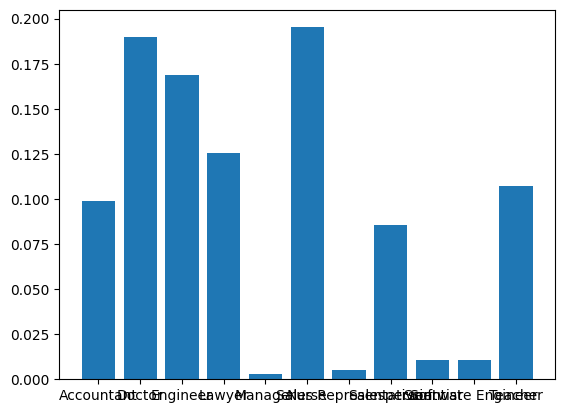

In [42]:
pmf_occu = empiricaldist.Pmf.from_seq(sleep_df['Occupation'], normalize=True)
pmf_occu.bar()
pmf_occu('Nurse')  # La probabilidad de escoger a una enfermera entre los encuestados es de 19.5 %
pmf_occu('Manager')  # La probabilidad de escoger a un manager entre los encuestados es de 0.26 %
pmf_occu('Engineer')  # La probabilidad de escoger a un ingeniero entre los encuestados es de 16.84 %

0.53475935828877

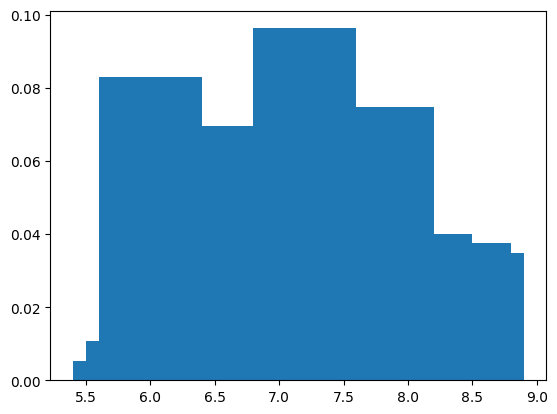

In [43]:
pmf_duration = empiricaldist.Pmf.from_seq(sleep_df['Sleep Duration'], normalize=True)
pmf_duration.bar()
pmf_duration(7.2) * 100 # La probabilidad de escoger a alguien que duerma 7.2 horas es de 9.62 %
pmf_duration(5.8) * 100 # La probabilidad de escoger a alguien que duerma 5.8 horas es de 0.53 %

0.026737967914438502

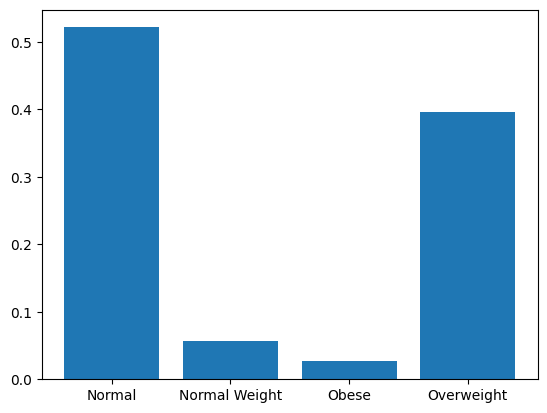

In [44]:
pmf_bmi = empiricaldist.Pmf.from_seq(sleep_df['BMI Category'], normalize=True)
pmf_bmi.bar()
pmf_bmi('Obese')  # La probabilidad de escoger un obeso entre los encuestados es de 2,67 %

0.20588235294117646

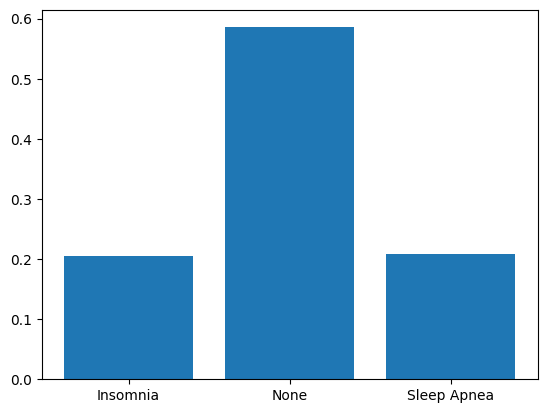

In [45]:
pmf_disorder = empiricaldist.Pmf.from_seq(sleep_df['Sleep Disorder'], normalize=True)
pmf_disorder.bar()
pmf_disorder('Insomnia') # La probabilidad de escoger alguien que sufre de insomnio es de 20.58 %

In [46]:
pmf_blood = empiricaldist.Pmf.from_seq(sleep_df['Blood Pressure'], normalize=True)
# pmf_blood.bar()
pmf_blood('130/85')  # La probabilidad de escoger a alguien que tenga la presion en 130/85 es de 26.47 %
pmf_blood('125/80')  # La probabilidad de escoger a alguien que tenga la presion en 125/80 es de 17.37 %

0.17379679144385027

# CDF

In [47]:
sleep_df.describe(include='all')

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
count,374.000000,374,374.000000,374,374.000000,374.000000,374.000000,374.000000,374,374,374.000000,374.000000,374
unique,NaN,2,NaN,11,NaN,NaN,NaN,NaN,4,25,NaN,NaN,3
top,NaN,Male,NaN,Nurse,NaN,NaN,NaN,NaN,Normal,130/85,NaN,NaN,None
freq,NaN,189,NaN,73,NaN,NaN,NaN,NaN,195,99,NaN,NaN,219
mean,187.500000,NaN,42.184492,NaN,7.132086,7.312834,59.171123,5.385027,NaN,NaN,70.165775,6816.844920,NaN
std,108.108742,NaN,8.673133,NaN,0.795657,1.196956,20.830804,1.774526,NaN,NaN,4.135676,1617.915679,NaN
min,1.000000,NaN,27.000000,NaN,5.800000,4.000000,30.000000,3.000000,NaN,NaN,65.000000,3000.000000,NaN
25%,94.250000,NaN,35.250000,NaN,6.400000,6.000000,45.000000,4.000000,NaN,NaN,68.000000,5600.000000,NaN
50%,187.500000,NaN,43.000000,NaN,7.200000,7.000000,60.000000,5.000000,NaN,NaN,70.000000,7000.000000,NaN
75%,280.750000,NaN,50.000000,NaN,7.800000,8.000000,75.000000,7.000000,NaN,NaN,72.000000,8000.000000,NaN


6 ******** 31.283422459893046


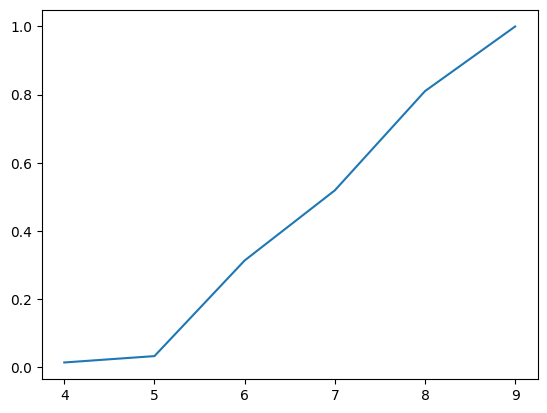

In [48]:
cdf_quali = empiricaldist.Cdf.from_seq(sleep_df['Quality of Sleep'])
cdf_quali.plot()
q = 6
p = cdf_quali(q)

print(q,'********', p * 100) # La probabilidad de escoger a una persona que tenga una calidad de sueño de 6 o menor es del 31.28 %

<AxesSubplot: xlabel='Quality of Sleep', ylabel='Proportion'>

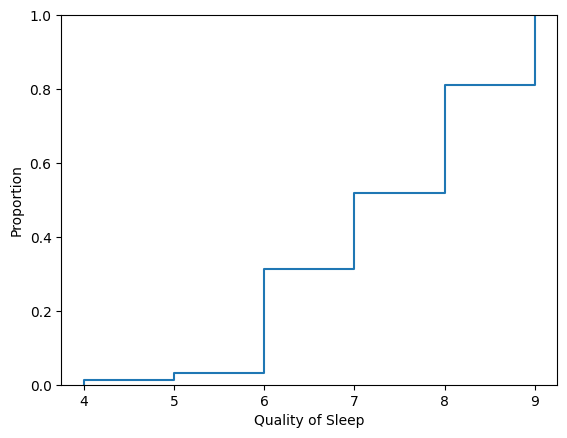

In [49]:
sns.ecdfplot(data=sleep_df, x='Quality of Sleep')

60 ************ 61.76470588235294


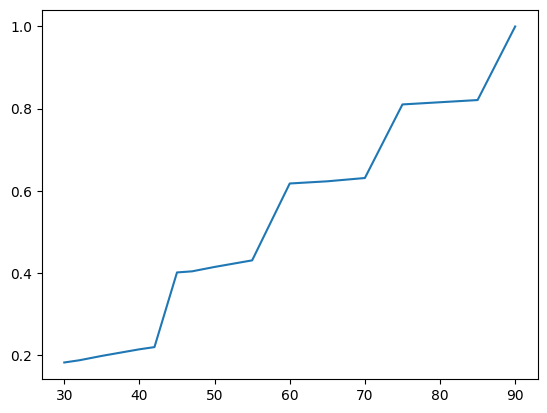

In [50]:
cdf_acti = empiricaldist.Cdf.from_seq(sleep_df['Physical Activity Level'])
cdf_acti.plot()

q = 60
p = cdf_acti(q)

print(q, '************', p * 100) # La probabilidad de escoger a una persona que haga 60 minutos o menos de ejercicio diario es de 61.76 %

<AxesSubplot: xlabel='Physical Activity Level', ylabel='Proportion'>

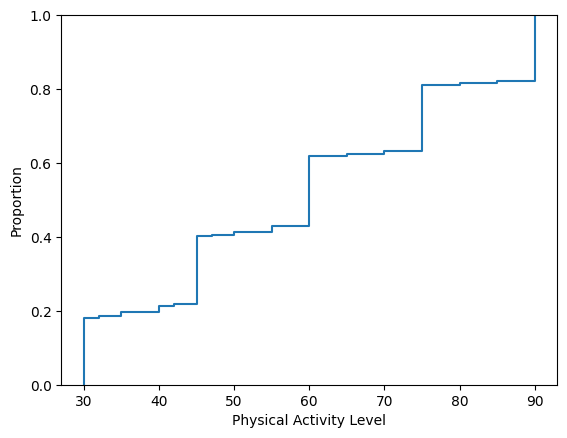

In [51]:
sns.ecdfplot(data=sleep_df, x='Physical Activity Level')

5 **** 55.61497326203209


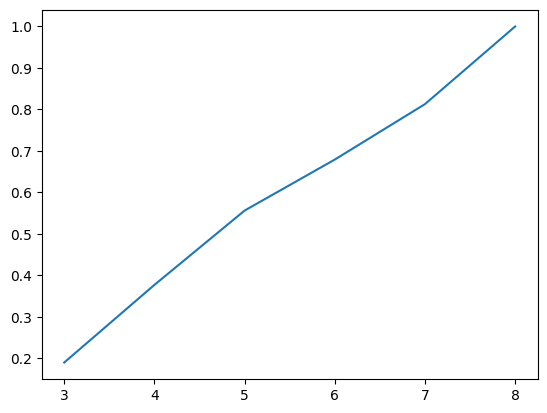

In [52]:
cdf_stress = empiricaldist.Cdf.from_seq(sleep_df['Stress Level'])
cdf_stress.plot()

q = 5
p = cdf_stress(q)

print(q, '****', p * 100) # La probabilidad de escoger a alguien que maneje un nivel de estres de 5 o menor es de 55.61 %


<AxesSubplot: xlabel='Stress Level', ylabel='Proportion'>

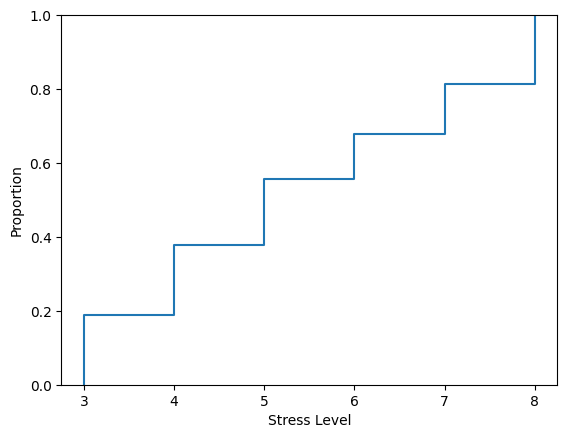

In [53]:
sns.ecdfplot(data=sleep_df, x='Stress Level')

75  ****  93.58288770053476


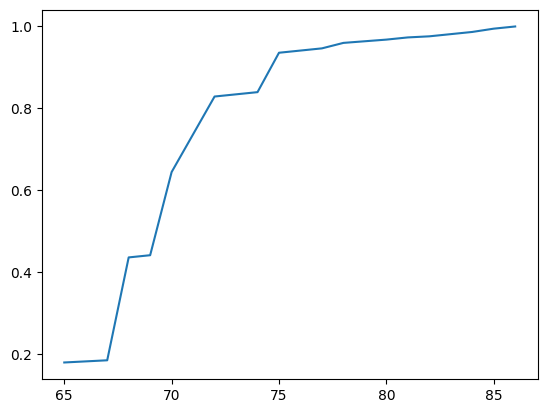

In [54]:
cdf_rate = empiricaldist.Cdf.from_seq(sleep_df['Heart Rate'])
cdf_rate.plot()

q = 75
p = cdf_rate(75)
print(q,' **** ', p * 100) # La probabilidad de escoger a alguien con la frecuencia cardiaca de 75 o menos pulsaciones por minuto es de 93.58 %

<AxesSubplot: xlabel='Heart Rate', ylabel='Proportion'>

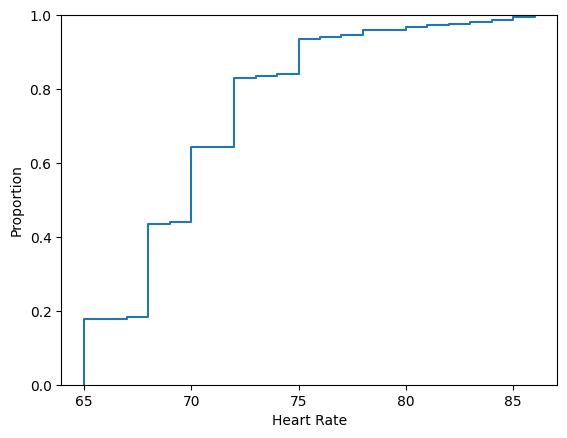

In [55]:
sns.ecdfplot(data=sleep_df, x='Heart Rate')

5000  *****  76.7379679144385


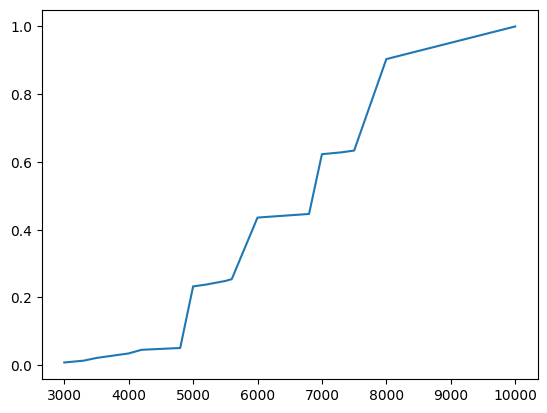

In [56]:
cdf_steps = empiricaldist.Cdf.from_seq(sleep_df['Daily Steps'])
cdf_steps.plot()

q = 5000
p = cdf_steps(q)

print(q, ' ***** ', (1 -p) * 100) # La probabilidad de escoger a alguien que de mas de 5000 pasos diarios es de 76.73 %

<AxesSubplot: xlabel='Daily Steps', ylabel='Proportion'>

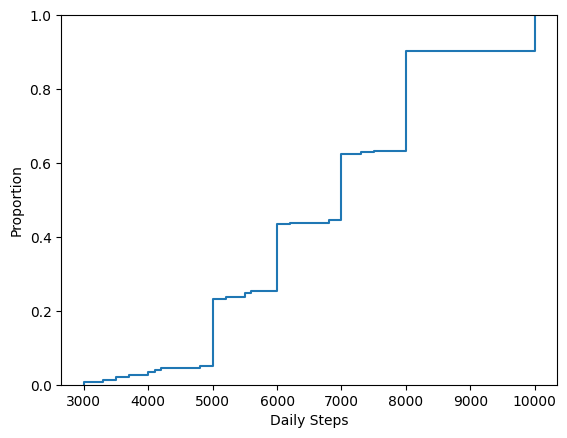

In [57]:
sns.ecdfplot(data=sleep_df, x='Daily Steps')

# PDF

In [58]:
sleep_df.describe(include='all')

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
count,374.000000,374,374.000000,374,374.000000,374.000000,374.000000,374.000000,374,374,374.000000,374.000000,374
unique,NaN,2,NaN,11,NaN,NaN,NaN,NaN,4,25,NaN,NaN,3
top,NaN,Male,NaN,Nurse,NaN,NaN,NaN,NaN,Normal,130/85,NaN,NaN,None
freq,NaN,189,NaN,73,NaN,NaN,NaN,NaN,195,99,NaN,NaN,219
mean,187.500000,NaN,42.184492,NaN,7.132086,7.312834,59.171123,5.385027,NaN,NaN,70.165775,6816.844920,NaN
std,108.108742,NaN,8.673133,NaN,0.795657,1.196956,20.830804,1.774526,NaN,NaN,4.135676,1617.915679,NaN
min,1.000000,NaN,27.000000,NaN,5.800000,4.000000,30.000000,3.000000,NaN,NaN,65.000000,3000.000000,NaN
25%,94.250000,NaN,35.250000,NaN,6.400000,6.000000,45.000000,4.000000,NaN,NaN,68.000000,5600.000000,NaN
50%,187.500000,NaN,43.000000,NaN,7.200000,7.000000,60.000000,5.000000,NaN,NaN,70.000000,7000.000000,NaN
75%,280.750000,NaN,50.000000,NaN,7.800000,8.000000,75.000000,7.000000,NaN,NaN,72.000000,8000.000000,NaN


<AxesSubplot: xlabel='Sleep Duration', ylabel='Density'>

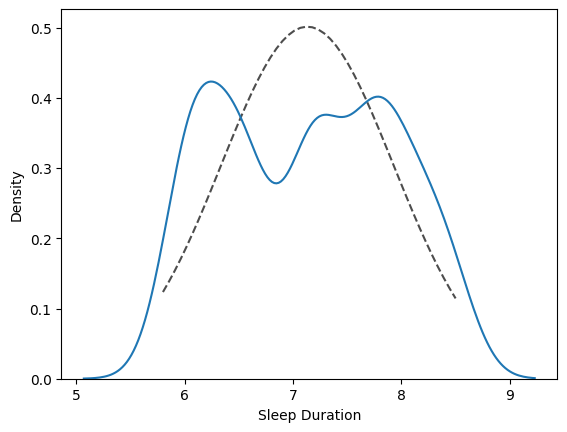

In [59]:
x = np.linspace(sleep_df['Sleep Duration'].min(), sleep_df['Sleep Duration'].max())
y = scipy.stats.norm(sleep_df['Sleep Duration'].mean(), sleep_df['Sleep Duration'].std()).pdf(x)


plt.plot(x,y,color='.3', linestyle='dashed')
sns.kdeplot(data=sleep_df, x='Sleep Duration')


In [60]:
sleep_df = sleep_df.drop('Person ID', axis=1)

In [61]:
sleep_df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

# Scatterplot, histograma 2d, kdeplot, jointplot, heatmap, clustermap

<AxesSubplot: xlabel='Age', ylabel='Daily Steps'>

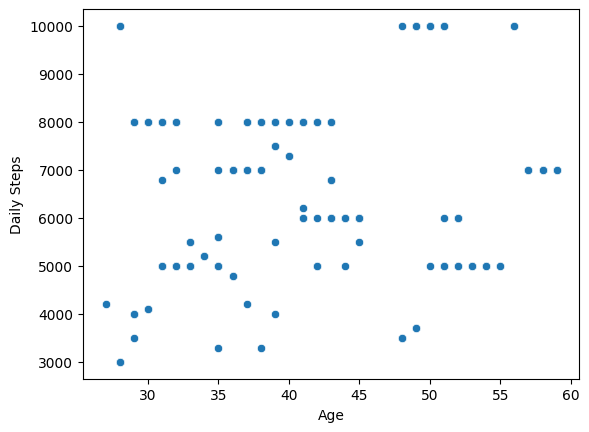

In [62]:
sns.scatterplot(data=sleep_df, x='Age', y='Daily Steps')

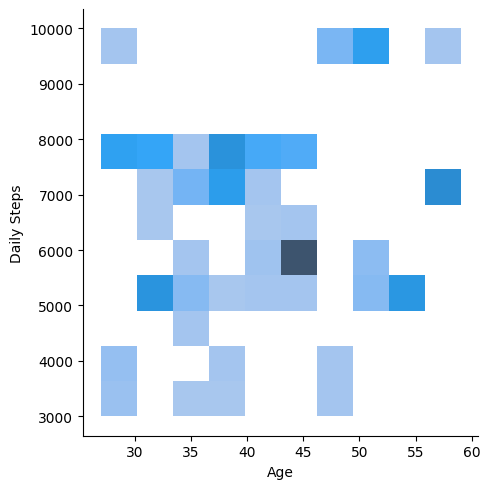

In [63]:
sns.displot(data=sleep_df, x='Age', y='Daily Steps')

<AxesSubplot: xlabel='Age', ylabel='Daily Steps'>

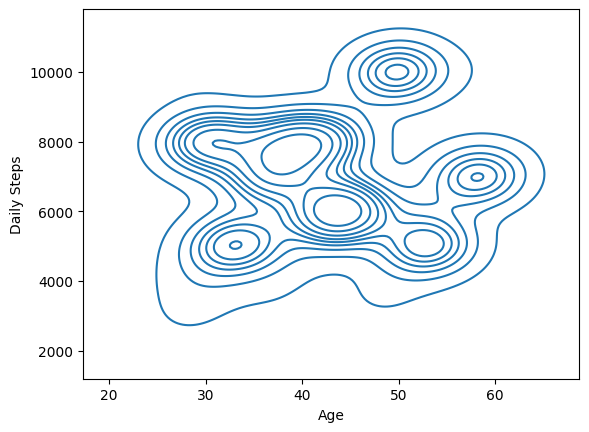

In [64]:
sns.kdeplot(data=sleep_df, x='Age', y='Daily Steps')

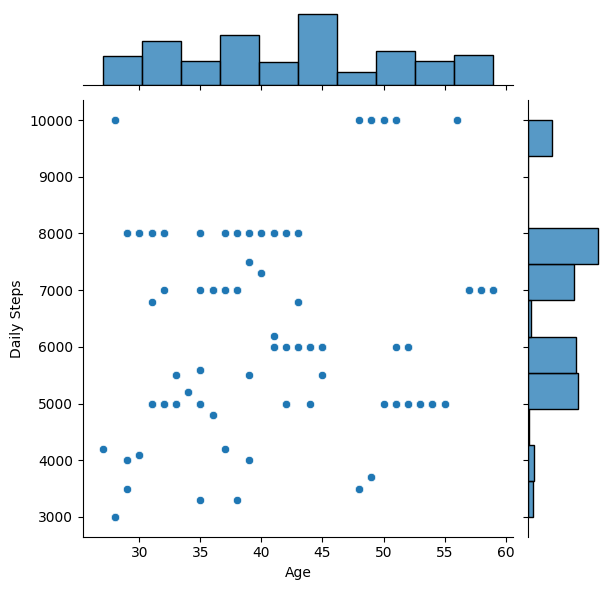

In [65]:
sns.jointplot(data=sleep_df, x='Age', y='Daily Steps')

<AxesSubplot: >

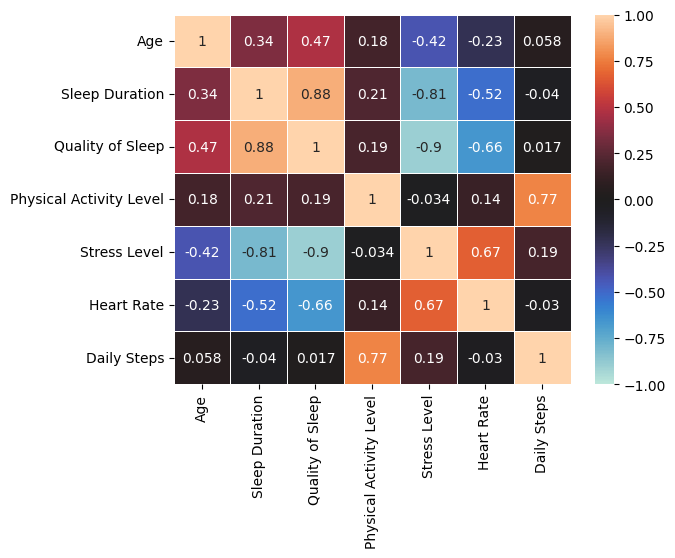

In [66]:
sns.heatmap(data=sleep_df.corr(numeric_only=True), annot=True, vmin=-1,vmax=1, center=0, linewidths=0.5)

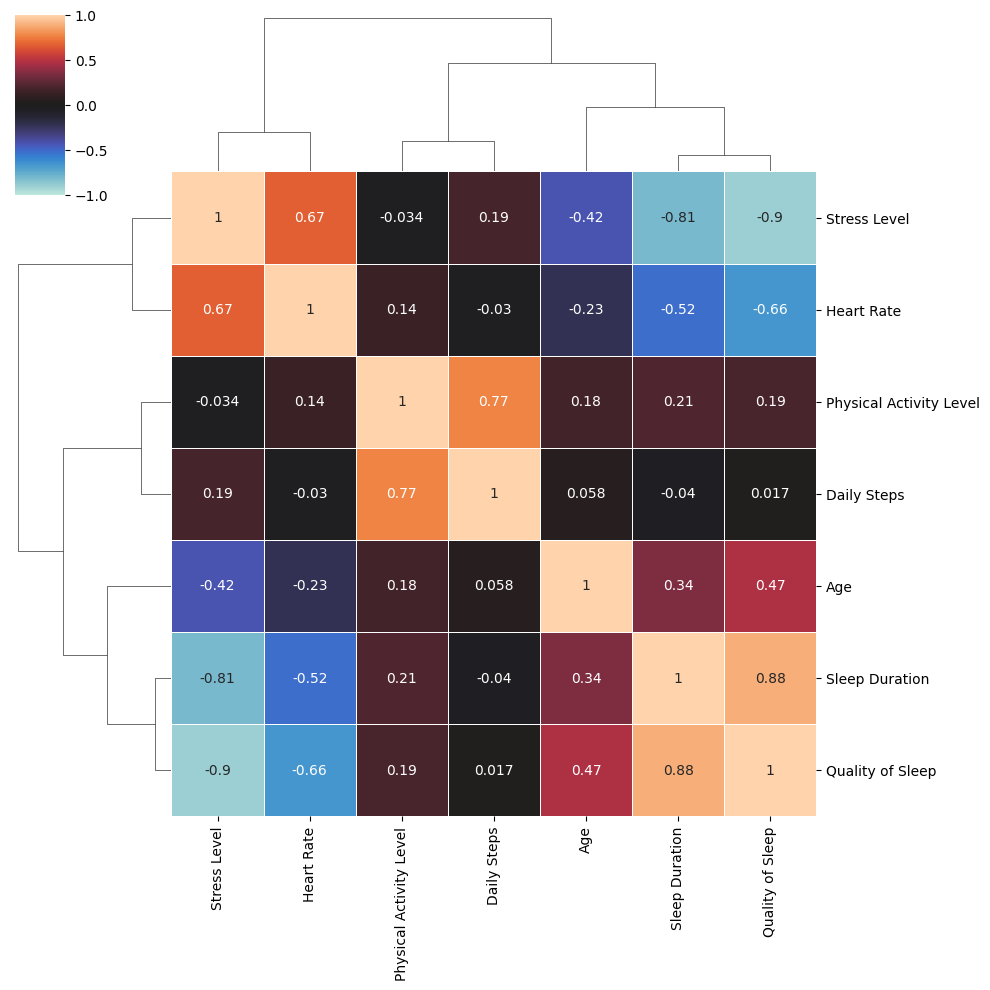

In [67]:
sns.clustermap(data=sleep_df.corr(numeric_only=True), annot=True, vmin=-1,vmax=1, center=0, linewidths=0.5)

# Boxplot, stripplot, swarmplot, violinplot

In [68]:
sleep_df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


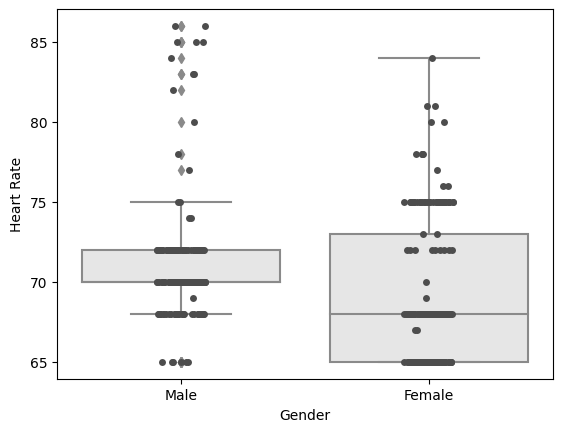

In [69]:
a = sns.boxplot(data=sleep_df, x='Gender', y='Heart Rate', color='.9')
a = sns.stripplot(data=sleep_df, x='Gender', y='Heart Rate', color='.3')

/home/manezn98/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 53.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/manezn98/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 72.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/manezn98/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 61.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/manezn98/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 79.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


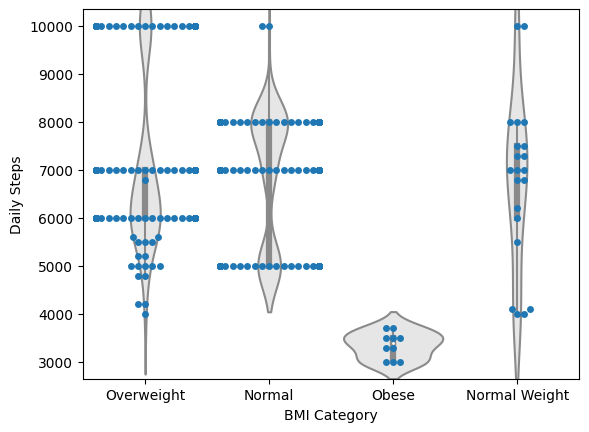

In [70]:
b = sns.violinplot(data=sleep_df, x='BMI Category', y='Daily Steps', color='.9')
b = sns.swarmplot(data=sleep_df, x='BMI Category', y='Daily Steps')

# Regresion lineal simple

LinregressResult(slope=1.328672263030931, intercept=-2.1633700385259473, rvalue=0.883213000410617, pvalue=2.1709917708686507e-124, stderr=0.03657867065238672, intercept_stderr=0.2624963022155583)


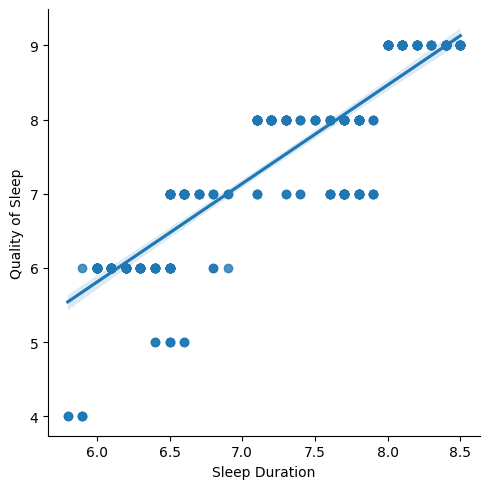

In [71]:
print(scipy.stats.linregress(x=sleep_df['Sleep Duration'], y=sleep_df['Quality of Sleep']))


sns.lmplot(data=sleep_df, x='Sleep Duration', y='Quality of Sleep'); # La calidad del sueño se ve impactada positivamente a medida que la duracion del sueño aumenta

LinregressResult(slope=-0.6062274064158978, intercept=10.577385017437482, rvalue=-0.8987520310040436, pvalue=2.8801242409331463e-135, stderr=0.015333860119264095, intercept_stderr=0.08692964976681036)


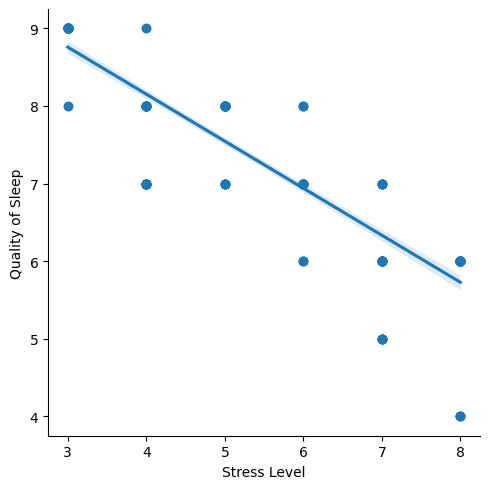

In [72]:
print(scipy.stats.linregress(x=sleep_df['Stress Level'], y=sleep_df['Quality of Sleep']))

sns.lmplot(data=sleep_df, x='Stress Level', y='Quality of Sleep') # La calidad del sueño se ve afectada negativamente a medida que los niveles de estres aumentan

# Regresion Multiple

In [73]:
sleep_df.columns = ['Gender', 'Age', 'Occupation','Sleep_Duration','Quality_of_Sleep','Physical_Activity_Level','Stress_Level','BMI_Category','Blood_Pressure','Heart_Rate','Daily_Steps','Sleep_Disorder']

In [74]:
model_1 = smf.ols(formula='Quality_of_Sleep ~ Physical_Activity_Level + Stress_Level + Daily_Steps + C(Occupation)', data=sleep_df).fit()
model_1.summary()

df_comparison_1 = pd.DataFrame(dict(actual_values=sleep_df.Quality_of_Sleep, predicted_values = model_1.predict().round()))

sklearn.metrics.accuracy_score(df_comparison_1.actual_values, df_comparison_1.predicted_values)

0.8983957219251337

In [75]:
model_2 = smf.ols(formula='Heart_Rate ~ Physical_Activity_Level + Stress_Level + Daily_Steps + C(Occupation)', data=sleep_df).fit()
model_2.summary()

df_comparison_2 = pd.DataFrame(dict(actual_values=sleep_df.Heart_Rate, predicted_values = model_2.predict().round()))

sklearn.metrics.accuracy_score(df_comparison_2.actual_values, df_comparison_2.predicted_values)

0.44919786096256686

# Regresion Logistica: predice variables categoricas

In [88]:
sleep_df = sleep_df.assign(is_normal = lambda df: df.BMI_Category.replace(['Normal','Overweight','Normal Weight','Obese'],[1,0,0,0]))

model_is_normal = smf.logit(formula='is_normal ~ Sleep_Duration + Daily_Steps + Heart_Rate + Quality_of_Sleep + Physical_Activity_Level + Stress_Level', data=sleep_df).fit()

df_comparison_3 = pd.DataFrame(dict(actual_values = sleep_df.is_normal, predicted_values = model_is_normal.predict().round()))

print(sklearn.metrics.confusion_matrix(df_comparison_3.actual_values, df_comparison_3.predicted_values))
print(sklearn.metrics.accuracy_score(df_comparison_3.actual_values, df_comparison_3.predicted_values))

Optimization terminated successfully.
         Current function value: 0.421953
         Iterations 8
[[158  21]
 [ 36 159]]
0.8475935828877005


In [89]:
sleep_df = sleep_df.assign(is_Overweight = lambda df: df.BMI_Category.replace(['Normal','Overweight','Normal Weight','Obese'],[0,1,0,0]))

model_is_overweight = smf.logit(formula='is_Overweight ~ Sleep_Duration + Daily_Steps + Heart_Rate + Quality_of_Sleep + Physical_Activity_Level + Stress_Level', data=sleep_df).fit()

df_comparison_4 = pd.DataFrame(dict(actual_values = sleep_df.is_Overweight, predicted_values = model_is_overweight.predict().round()))

print(sklearn.metrics.confusion_matrix(df_comparison_4.actual_values, df_comparison_4.predicted_values))
print(sklearn.metrics.accuracy_score(df_comparison_4.actual_values, df_comparison_4.predicted_values))

Optimization terminated successfully.
         Current function value: 0.507745
         Iterations 7
[[178  48]
 [ 61  87]]
0.7085561497326203
